# Aula 2: Exemplo Supply Chain

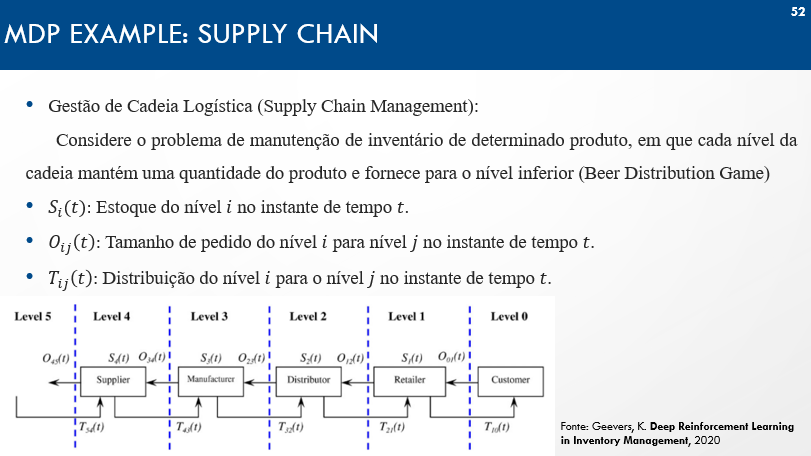

Vamos implementar o ambiente do problema de Supply Chain (Beer Distribution Game) visto em aula e visualizar as componentes do MDP associado.

## Imports

In [36]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
import random
plt.style.use('fivethirtyeight')

In [37]:
AVG_CUSTOMER_DEMAND = 2
MAX_TIMESTEP = 180
ALPHA = [1,1,1,1] # Inventory Management Cost per product on each level
BETA = [2,2,2,4] # Inventory Lack of Supply Cost per product on each level

## Environment Class

In [38]:
class BeerGameEnv:
    def __init__(self,max_inventory, max_order):

        # Supply Chain Levels
        self.levels = ['Supplier', 'Manufacturer', 'Distributor', 'Retailer']

        # MDP State Space
        n_levels = len(self.levels)
        inventories = list(range(max_inventory+1))
        aux = [inventories] * n_levels
        state_space = list(itertools.product(*aux))
        self.state_space = [list(e) for e in state_space]

        # MDP Action Space
        orders = list(range(max_order+1))
        aux = [orders] * n_levels
        action_space = list(itertools.product(*aux))
        self.action_space = [list(e) for e in action_space]

        # Initial State
        initial_inventory = int(max_inventory/2)
        self.initial_state = list(initial_inventory*np.ones(len(self.levels)).astype(int))
    
    def show(self):
        fig = plt.figure()
        ax = fig.gca()
        ax.bar(self.levels, self.s)
        ax.set_xlabel('Supply Chain Level')
        ax.set_ylabel('Inventory')
    
    def reset(self):
        self.t = 0
        self.s = self.initial_state.copy()
        return self.s
    
    def step(self,a):
        # Increment Time-Step
        self.t += 1

        # Customer Demand
        #-------------------------------------------------------
        gaussian = np.random.normal(AVG_CUSTOMER_DEMAND)
        customer_demand = max([0, int(np.round(gaussian))])
        print("Customer Demand: " + str(customer_demand))

        # Add Customer demand as last level 'order'
        order = a.copy()
        order.append(customer_demand)
        #-------------------------------------------------------

        # distributions to lower level (from customer to supplier)
        #-----------------------------------------------------------------------
        # Verify if inventory supports order (minimum inventory)
        T = []
        for i in range(len(self.levels)-1, -1, -1):
            distribution = min([self.s[i], order[i+1]])
            T.append(distribution)
        T.reverse()

        # Verify if order causes inventory to exceed maximum (maximum inventory)
        for i in range(len(self.levels)-2, -1, -1):
            if (self.s[i+1] + T[i] - T[i+1] > 9):
                dif = (self.s[i+1] + T[i] - T[i+1]) - 9
                T[i] = T[i] - dif
        #-----------------------------------------------------------------------
        

        # Reward Function
        r = 0
        for i in range(1,len(self.levels)):
            r -= ALPHA[i]*self.s[i] + BETA[i]*max([0,  order[i+1] - T[i]])


        # Next State
        S_next = self.s.copy()
        S_next[0] = min([S_next[0] + order[0] - T[0],  9])
        for i in range(1,len(self.levels)):
            S_next[i] = min([self.s[i] + T[i-1] - T[i], 9])
        
        # Update Current State
        self.s = S_next.copy()

        # Check end of episode
        done = False
        if (self.t == MAX_TIMESTEP):
            print('End of Episode')
            done = True
        
        return S_next, r, done


    






### Criação de ambiente
Vamos criar um ambiente BeerGameEnv de acordo com o exemplo visto em aula (estoques máximos de 9 unidades e pedidos máximos de 3 unidades):

In [39]:
env = BeerGameEnv(max_inventory=9, max_order=3)

### Visualização de Espaço de Estados e Espaço de Ações

In [40]:
print('Espaço de Estados ' + str(env.state_space))
print('|S| = ' + str(len(env.state_space)))
print('Espaço de Ações: ' + str(env.action_space))
print('|A| = ' + str(len(env.action_space)))

Espaço de Estados [[0, 0, 0, 0], [0, 0, 0, 1], [0, 0, 0, 2], [0, 0, 0, 3], [0, 0, 0, 4], [0, 0, 0, 5], [0, 0, 0, 6], [0, 0, 0, 7], [0, 0, 0, 8], [0, 0, 0, 9], [0, 0, 1, 0], [0, 0, 1, 1], [0, 0, 1, 2], [0, 0, 1, 3], [0, 0, 1, 4], [0, 0, 1, 5], [0, 0, 1, 6], [0, 0, 1, 7], [0, 0, 1, 8], [0, 0, 1, 9], [0, 0, 2, 0], [0, 0, 2, 1], [0, 0, 2, 2], [0, 0, 2, 3], [0, 0, 2, 4], [0, 0, 2, 5], [0, 0, 2, 6], [0, 0, 2, 7], [0, 0, 2, 8], [0, 0, 2, 9], [0, 0, 3, 0], [0, 0, 3, 1], [0, 0, 3, 2], [0, 0, 3, 3], [0, 0, 3, 4], [0, 0, 3, 5], [0, 0, 3, 6], [0, 0, 3, 7], [0, 0, 3, 8], [0, 0, 3, 9], [0, 0, 4, 0], [0, 0, 4, 1], [0, 0, 4, 2], [0, 0, 4, 3], [0, 0, 4, 4], [0, 0, 4, 5], [0, 0, 4, 6], [0, 0, 4, 7], [0, 0, 4, 8], [0, 0, 4, 9], [0, 0, 5, 0], [0, 0, 5, 1], [0, 0, 5, 2], [0, 0, 5, 3], [0, 0, 5, 4], [0, 0, 5, 5], [0, 0, 5, 6], [0, 0, 5, 7], [0, 0, 5, 8], [0, 0, 5, 9], [0, 0, 6, 0], [0, 0, 6, 1], [0, 0, 6, 2], [0, 0, 6, 3], [0, 0, 6, 4], [0, 0, 6, 5], [0, 0, 6, 6], [0, 0, 6, 7], [0, 0, 6, 8], [0, 0, 6, 9], [

### Inicialização do ambiente

[4, 4, 4, 4]


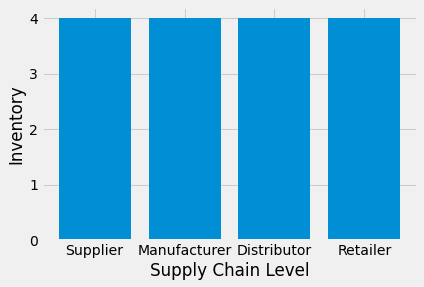

In [41]:
s = env.reset()
print(s)
env.show()

## Transition Class

In [42]:
class Transition():
    def __init__(self,s,a,r,s_next,done):
        self.s = s
        self.a = a
        self.r = r
        self.s_next = s_next
        self.done = done

## Simulate random agent on MDP

In [43]:
episode = []
for i in range(MAX_TIMESTEP):
    print('---------------------')
    print(i)
    s = env.s
    print("Current State: " + str(env.s))
    a = random.choice(env.action_space)
    print("Action: " + str(a))
    s_next, r, done = env.step(a)
    print("Next State: " + str(env.s))
    print("Reward: " + str(r))
    print("Done: " + str(done))
    # Store Transition
    transition = Transition(s,a,r,s_next,done)
    episode.append(transition)
    

---------------------
0
Current State: [4, 4, 4, 4]
Action: [2, 1, 0, 1]
Customer Demand: 1
Next State: [5, 5, 3, 4]
Reward: -12
Done: False
---------------------
1
Current State: [5, 5, 3, 4]
Action: [1, 1, 2, 2]
Customer Demand: 3
Next State: [5, 4, 3, 3]
Reward: -12
Done: False
---------------------
2
Current State: [5, 4, 3, 3]
Action: [1, 0, 3, 0]
Customer Demand: 1
Next State: [6, 1, 6, 2]
Reward: -10
Done: False
---------------------
3
Current State: [6, 1, 6, 2]
Action: [1, 0, 1, 0]
Customer Demand: 1
Next State: [7, 0, 7, 1]
Reward: -9
Done: False
---------------------
4
Current State: [7, 0, 7, 1]
Action: [0, 2, 2, 0]
Customer Demand: 2
Next State: [5, 2, 7, 0]
Reward: -15
Done: False
---------------------
5
Current State: [5, 2, 7, 0]
Action: [2, 1, 0, 1]
Customer Demand: 0
Next State: [6, 3, 6, 1]
Reward: -9
Done: False
---------------------
6
Current State: [6, 3, 6, 1]
Action: [3, 0, 2, 0]
Customer Demand: 3
Next State: [9, 1, 8, 0]
Reward: -16
Done: False
---------------

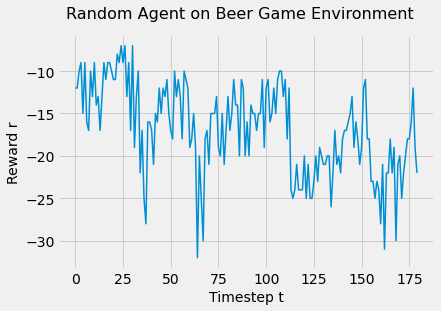

In [44]:
# Plot Episode Rewards
rewards = [t.r for t in episode]
fig = plt.figure()
ax = fig.gca()
ax.plot(rewards, lw=1.5)
fig.suptitle('Random Agent on Beer Game Environment', fontsize=16)
ax.set_xlabel('Timestep t', fontsize=14)
ax.set_ylabel('Reward r', fontsize=14)
plt.show()